Total loss / Iteration


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['total_loss'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.title('Total Loss vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('total_loss_vs_iteration.png', dpi=300)
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

LPIPS vs. Iteration (Line Plot)

In [ ]:
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['lpips'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('LPIPS', fontsize=12)
plt.title('LPIPS vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('lpips_vs_iteration.png', dpi=300)
plt.show()

SSIM vs. Iteration (Line Plot)

In [ ]:
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['ssim'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('SSIM', fontsize=12)
plt.title('SSIM vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('ssim_vs_iteration.png', dpi=300)
plt.show()

PSNR vs. Iteration (Line Plot)

In [ ]:
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['psnr'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('PSNR (dB)', fontsize=12)
plt.title('PSNR vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('psnr_vs_iteration.png', dpi=300)
plt.show()

Final metric Comparison

In [ ]:
import numpy as np

# Normalize metrics for comparison (SSIM: [0,1], PSNR: scale to [0,1], LPIPS: invert and scale)
final_metrics = {'Model': [], 'SSIM': [], 'PSNR': [], 'LPIPS': []}
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    final_metrics['Model'].append(model)
    final_metrics['SSIM'].append(final['ssim'])
    final_metrics['PSNR'].append(final['psnr'] / 40)  # Scale PSNR (assuming max ~40)
    final_metrics['LPIPS'].append(1 - final['lpips'] / 0.5)  # Invert LPIPS (assuming max ~0.5)

df_final = pd.DataFrame(final_metrics)
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.25
plt.bar(x - width, df_final['SSIM'], width, label='SSIM', color='blue')
plt.bar(x, df_final['PSNR'], width, label='PSNR (Scaled)', color='orange')
plt.bar(x + width, df_final['LPIPS'], width, label='LPIPS (Inverted)', color='green')
plt.xticks(x, models)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Normalized Metric Value', fontsize=12)
plt.title('Final Quality Metrics Comparison', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('final_metrics_bar.png', dpi=300)
plt.show()

Style Loss vs. Content Loss (Scatter Plot)

In [ ]:
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    plt.scatter(final['style_loss'], final['content_loss'], s=final['total_loss']*10, 
                label=model, color=color, alpha=0.6)
plt.xlabel('Style Loss', fontsize=12)
plt.ylabel('Content Loss', fontsize=12)
plt.title('Final Style Loss vs. Content Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('style_vs_content_scatter.png', dpi=300)
plt.show()

Inference Time vs. LPIPS (Scatter Plot)

In [ ]:
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    avg_inference_time = df['inference_time'].mean()
    plt.scatter(avg_inference_time, final['lpips'], label=model, color=color, s=100)
plt.xlabel('Average Inference Time (ms)', fontsize=12)
plt.ylabel('LPIPS', fontsize=12)
plt.title('Inference Time vs. LPIPS', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('inference_time_vs_lpips.png', dpi=300)
plt.show()

Box Plot of Final Metrics (Quality Metrics)

In [ ]:
# Assuming one run per model; for multiple runs, aggregate metrics
data = {'Model': [], 'Metric': [], 'Value': []}
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    data['Model'].append(model)
    data['Metric'].append('SSIM')
    data['Value'].append(final['ssim'])
    data['Model'].append(model)
    data['Metric'].append('PSNR')
    data['Value'].append(final['psnr'] / 40)
    data['Model'].append(model)
    data['Metric'].append('LPIPS')
    data['Value'].append(1 - final['lpips'] / 0.5)

df_box = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Value', hue='Model', data=df_box, palette=colors)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.title('Distribution of Final Quality Metrics', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('quality_metrics_box.png', dpi=300)
plt.show()

Radar Plot of Final Metrics

In [ ]:
from math import pi

metrics = ['SSIM', 'PSNR', 'LPIPS', 'Total Loss']
num_metrics = len(metrics)
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    values = [final['ssim'], final['psnr'] / 40, 1 - final['lpips'] / 0.5, 1 / (final['total_loss'] / 100)]
    values += values[:1]
    ax.plot(angles, values, label=model, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title('Final Metrics Comparison (Radar)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.tight_layout()
plt.savefig('metrics_radar.png', dpi=300)
plt.show()

Combined Loss Trends (Subplot)

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    axes[0].plot(df['iteration'], df['style_loss'], label=model, color=color, linewidth=2)
    axes[1].plot(df['iteration'], df['content_loss'], label=model, color=color, linewidth=2)
    axes[2].plot(df['iteration'], df['total_loss'], label=model, color=color, linewidth=2)
axes[0].set_ylabel('Style Loss', fontsize=12)
axes[1].set_ylabel('Content Loss', fontsize=12)
axes[2].set_ylabel('Total Loss', fontsize=12)
axes[2].set_xlabel('Iteration', fontsize=12)
axes[0].set_title('Loss Trends Across Models', fontsize=14)
for ax in axes:
    ax.legend(fontsize=10)
    ax.grid(True)
plt.tight_layout()
plt.savefig('loss_trends_subplot.png', dpi=300)
plt.show()

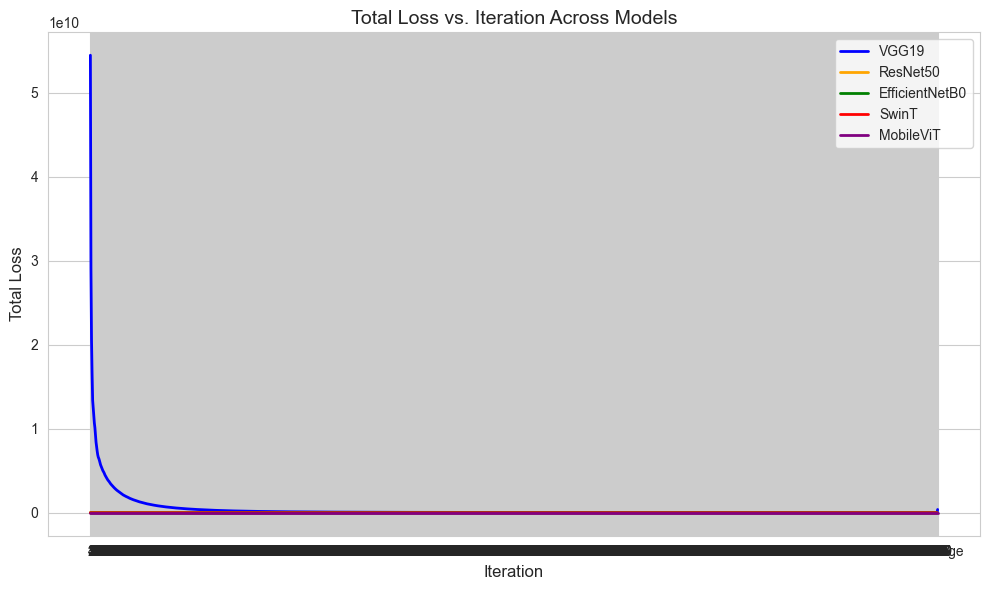

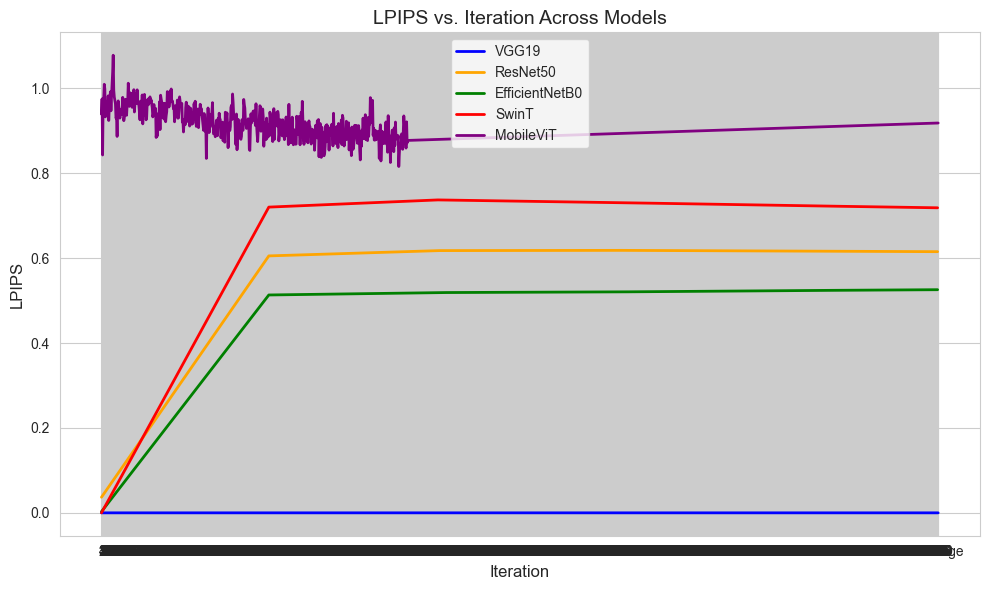

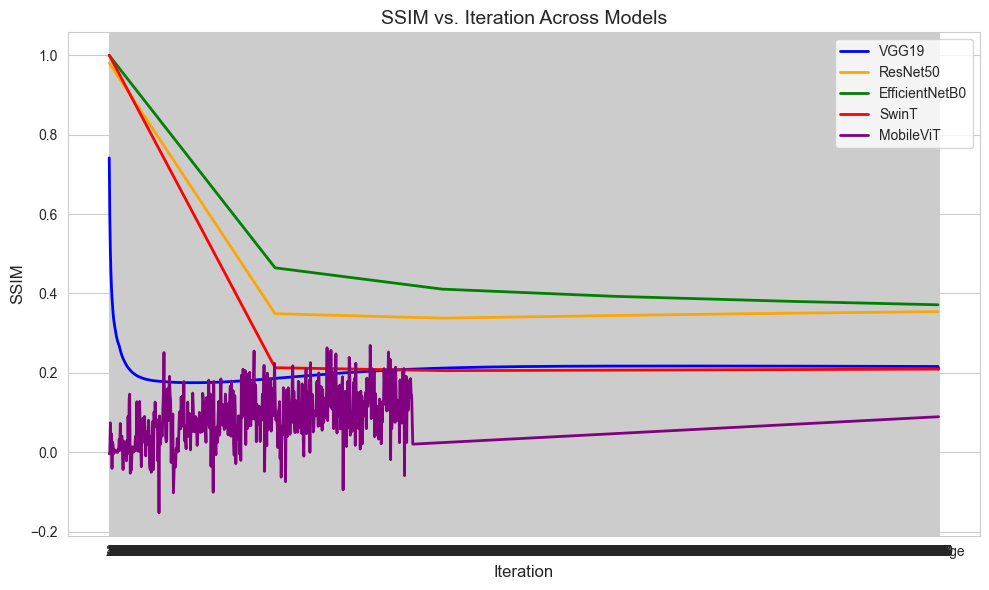

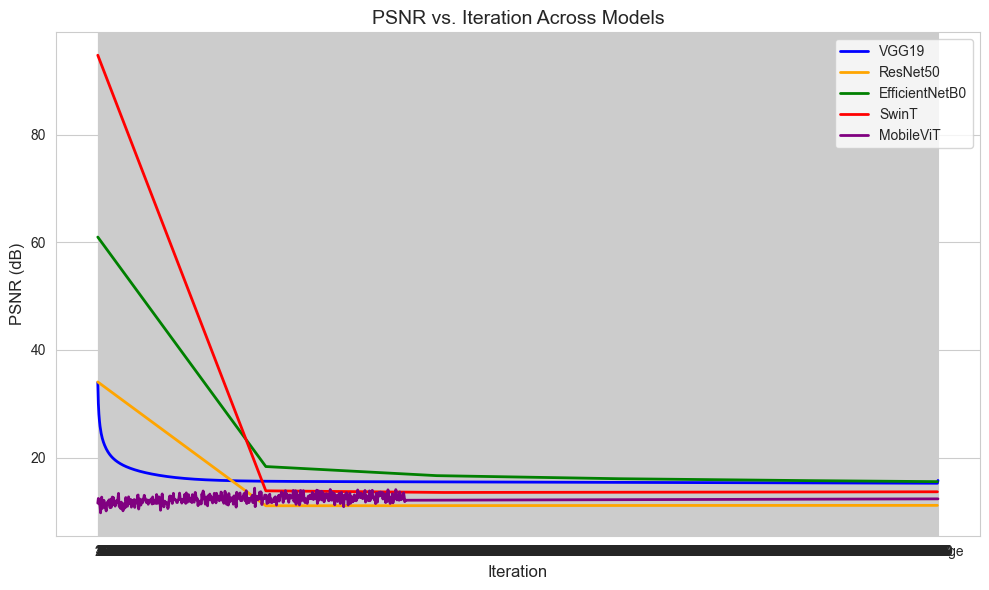

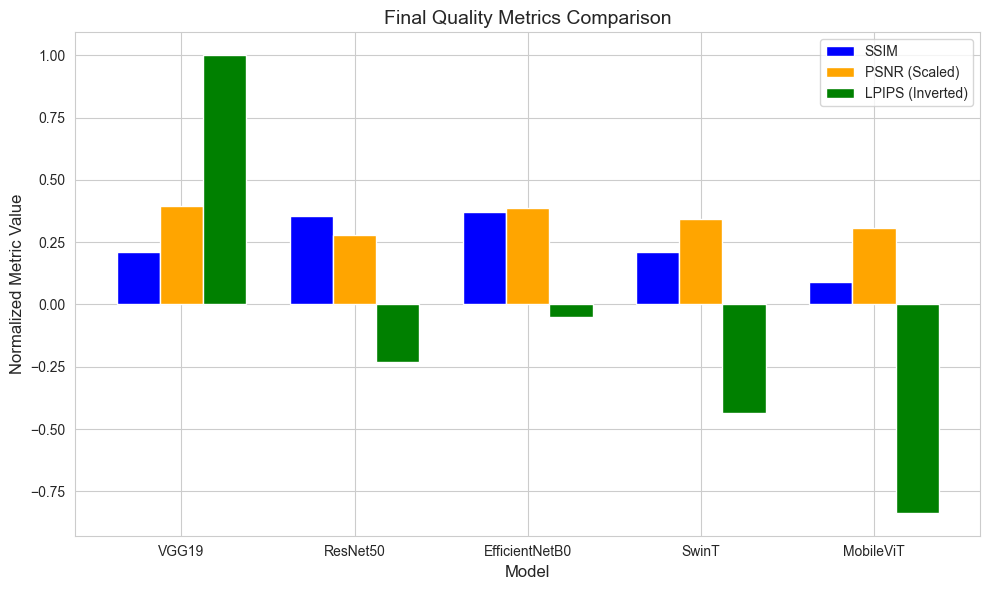

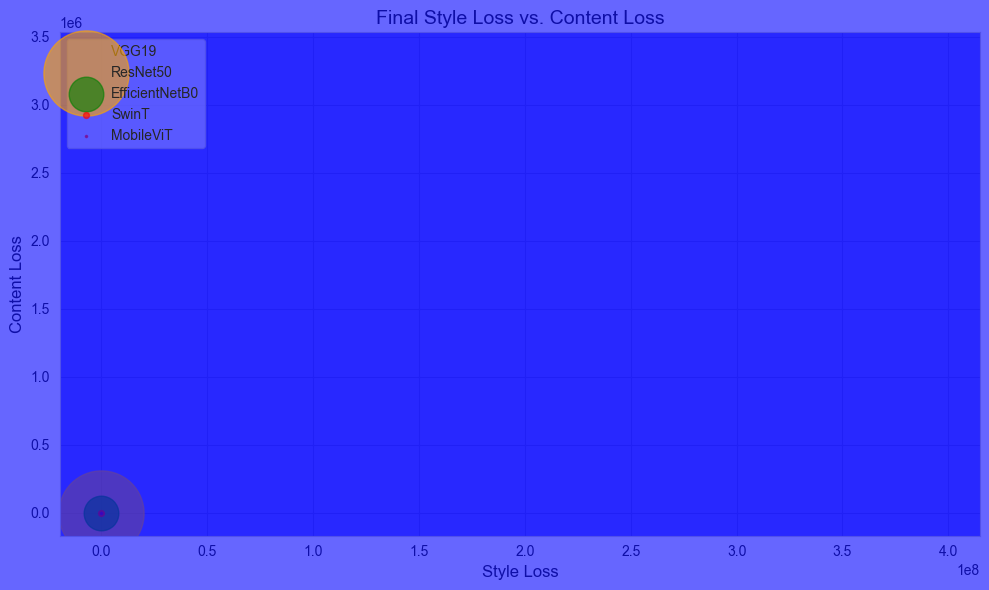

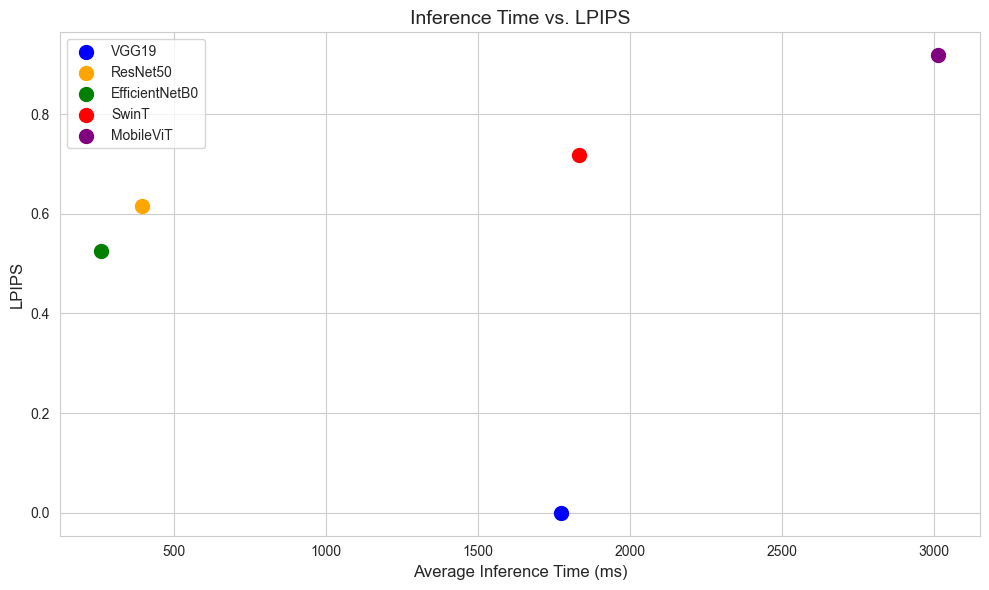

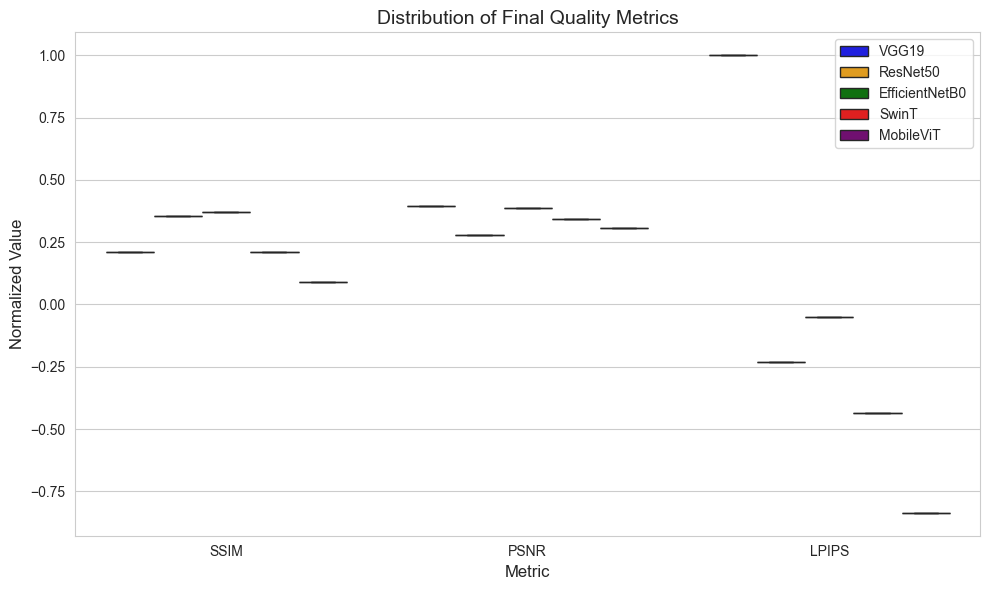

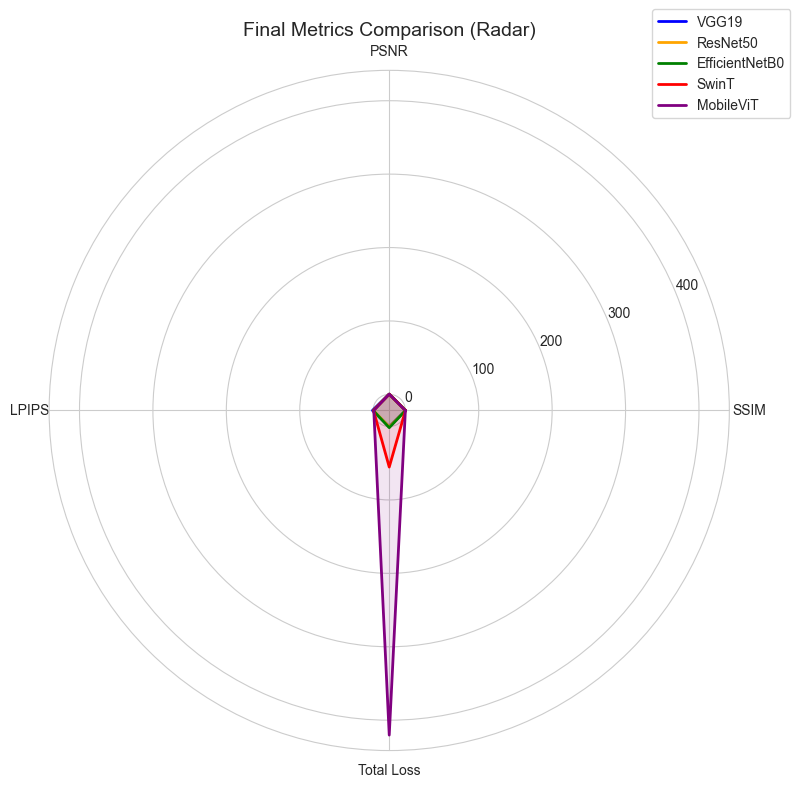

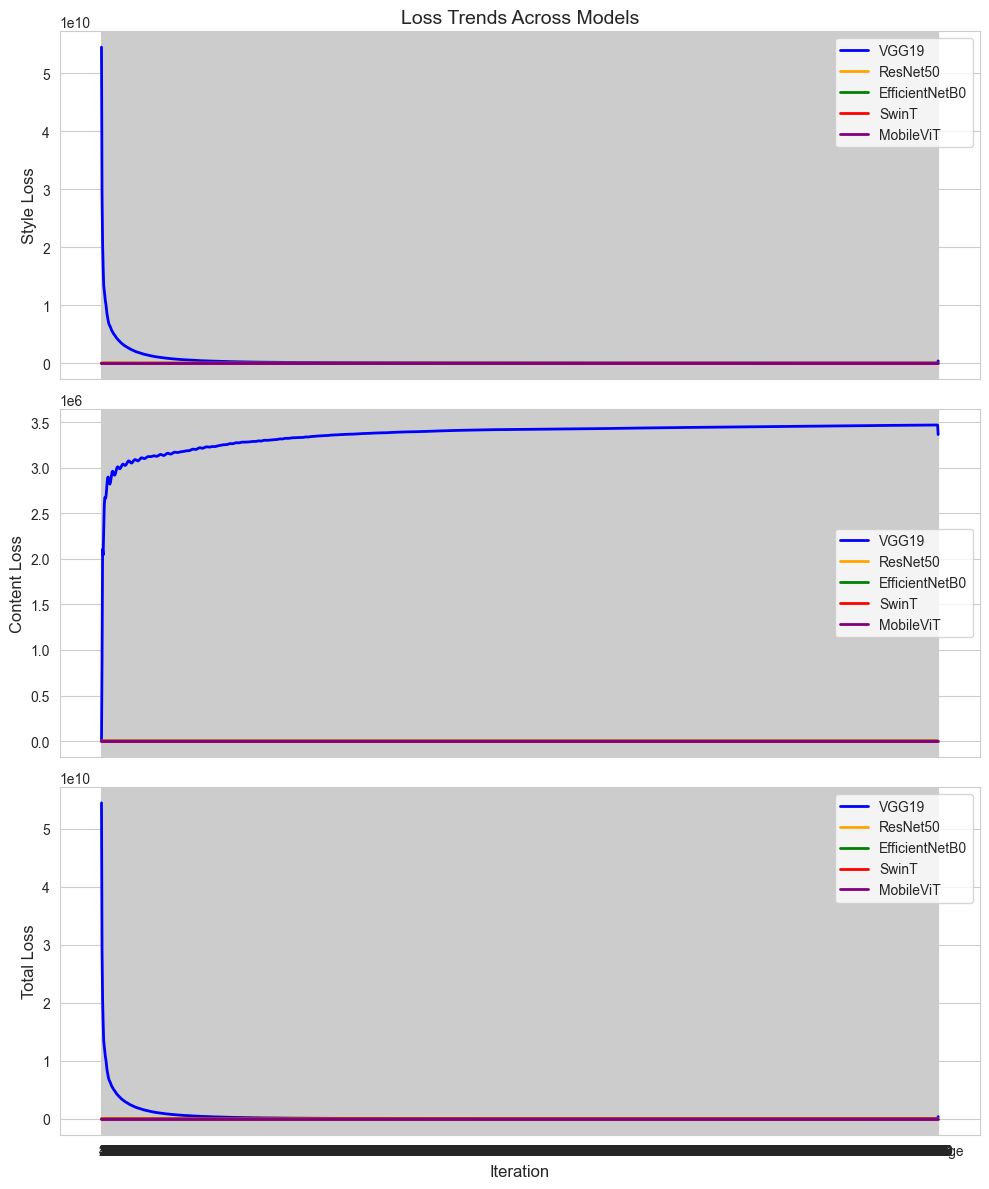

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Check if Seaborn is installed; fallback to Matplotlib style if not
try:
    sns.set_style('whitegrid')  # Use Seaborn's whitegrid style for publication-quality plots
except ImportError:
    plt.style.use('ggplot')  # Fallback to Matplotlib's ggplot style
    print("Seaborn not installed. Using 'ggplot' style. Install Seaborn with: pip install seaborn")

# Define models and colors for consistency
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot 1: Total Loss vs. Iteration (Line Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['total_loss'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.title('Total Loss vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('total_loss_vs_iteration.png', dpi=300)
plt.show()

# Plot 2: LPIPS vs. Iteration (Line Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['lpips'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('LPIPS', fontsize=12)
plt.title('LPIPS vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('lpips_vs_iteration.png', dpi=300)
plt.show()

# Plot 3: SSIM vs. Iteration (Line Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['ssim'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('SSIM', fontsize=12)
plt.title('SSIM vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('ssim_vs_iteration.png', dpi=300)
plt.show()

# Plot 4: PSNR vs. Iteration (Line Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    plt.plot(df['iteration'], df['psnr'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('PSNR (dB)', fontsize=12)
plt.title('PSNR vs. Iteration Across Models', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('psnr_vs_iteration.png', dpi=300)
plt.show()

# Plot 5: Final Metric Comparison (Bar Plot)
final_metrics = {'Model': [], 'SSIM': [], 'PSNR': [], 'LPIPS': []}
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    final_metrics['Model'].append(model)
    final_metrics['SSIM'].append(final['ssim'])
    final_metrics['PSNR'].append(final['psnr'] / 40)  # Scale PSNR (adjust based on max)
    final_metrics['LPIPS'].append(1 - final['lpips'] / 0.5)  # Invert LPIPS (adjust based on max)

df_final = pd.DataFrame(final_metrics)
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.25
plt.bar(x - width, df_final['SSIM'], width, label='SSIM', color='blue')
plt.bar(x, df_final['PSNR'], width, label='PSNR (Scaled)', color='orange')
plt.bar(x + width, df_final['LPIPS'], width, label='LPIPS (Inverted)', color='green')
plt.xticks(x, models)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Normalized Metric Value', fontsize=12)
plt.title('Final Quality Metrics Comparison', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('final_metrics_bar.png', dpi=300)
plt.show()

# Plot 6: Style Loss vs. Content Loss (Scatter Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    plt.scatter(final['style_loss'], final['content_loss'], s=final['total_loss']*10, 
                label=model, color=color, alpha=0.6)
plt.xlabel('Style Loss', fontsize=12)
plt.ylabel('Content Loss', fontsize=12)
plt.title('Final Style Loss vs. Content Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('style_vs_content_scatter.png', dpi=300)
plt.show()

# Plot 7: Inference Time vs. LPIPS (Scatter Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    avg_inference_time = df['inference_time'].mean()
    plt.scatter(avg_inference_time, final['lpips'], label=model, color=color, s=100)
plt.xlabel('Average Inference Time (ms)', fontsize=12)
plt.ylabel('LPIPS', fontsize=12)
plt.title('Inference Time vs. LPIPS', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('inference_time_vs_lpips.png', dpi=300)
plt.show()

# Plot 8: Box Plot of Final Metrics (Quality Metrics)
data = {'Model': [], 'Metric': [], 'Value': []}
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    data['Model'].append(model)
    data['Metric'].append('SSIM')
    data['Value'].append(final['ssim'])
    data['Model'].append(model)
    data['Metric'].append('PSNR')
    data['Value'].append(final['psnr'] / 40)
    data['Model'].append(model)
    data['Metric'].append('LPIPS')
    data['Value'].append(1 - final['lpips'] / 0.5)

df_box = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Value', hue='Model', data=df_box, palette=colors)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.title('Distribution of Final Quality Metrics', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('quality_metrics_box.png', dpi=300)
plt.show()

# Plot 9: Radar Plot of Final Metrics
metrics = ['SSIM', 'PSNR', 'LPIPS', 'Total Loss']
num_metrics = len(metrics)
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    values = [final['ssim'], final['psnr'] / 40, 1 - final['lpips'] / 0.5, 1 / (final['total_loss'] / 100)]
    values += values[:1]
    ax.plot(angles, values, label=model, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title('Final Metrics Comparison (Radar)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.tight_layout()
plt.savefig('metrics_radar.png', dpi=300)
plt.show()

# Plot 10: Combined Loss Trends (Subplot)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    axes[0].plot(df['iteration'], df['style_loss'], label=model, color=color, linewidth=2)
    axes[1].plot(df['iteration'], df['content_loss'], label=model, color=color, linewidth=2)
    axes[2].plot(df['iteration'], df['total_loss'], label=model, color=color, linewidth=2)
axes[0].set_ylabel('Style Loss', fontsize=12)
axes[1].set_ylabel('Content Loss', fontsize=12)
axes[2].set_ylabel('Total Loss', fontsize=12)
axes[2].set_xlabel('Iteration', fontsize=12)
axes[0].set_title('Loss Trends Across Models', fontsize=14)
for ax in axes:
    ax.legend(fontsize=10)
    ax.grid(True)
plt.tight_layout()
plt.savefig('loss_trends_subplot.png', dpi=300)
plt.show()

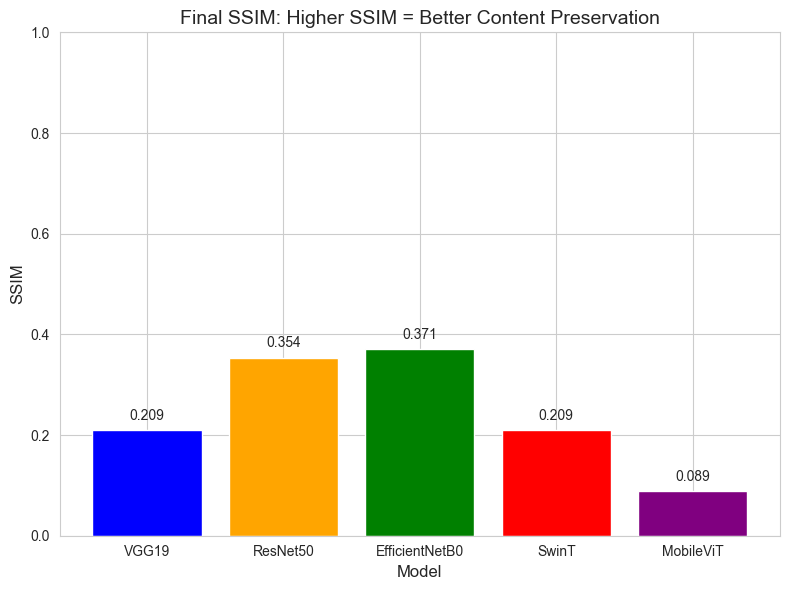

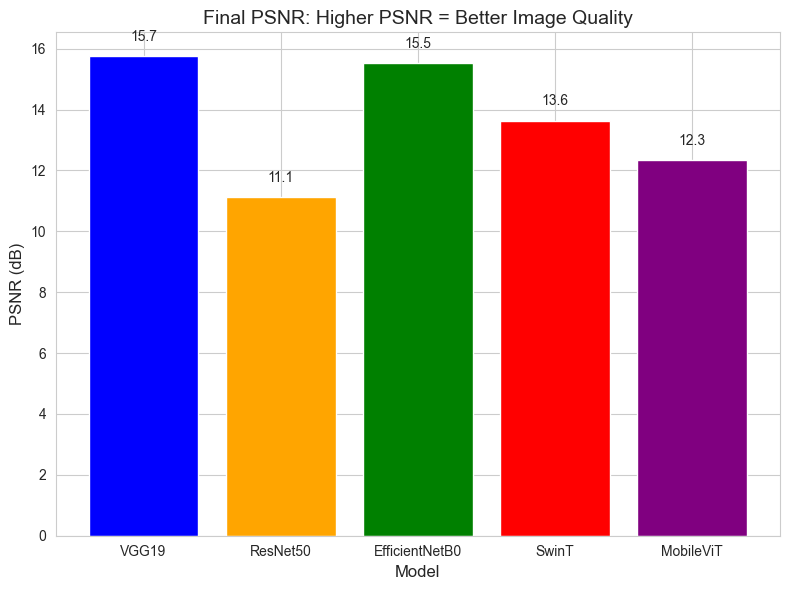

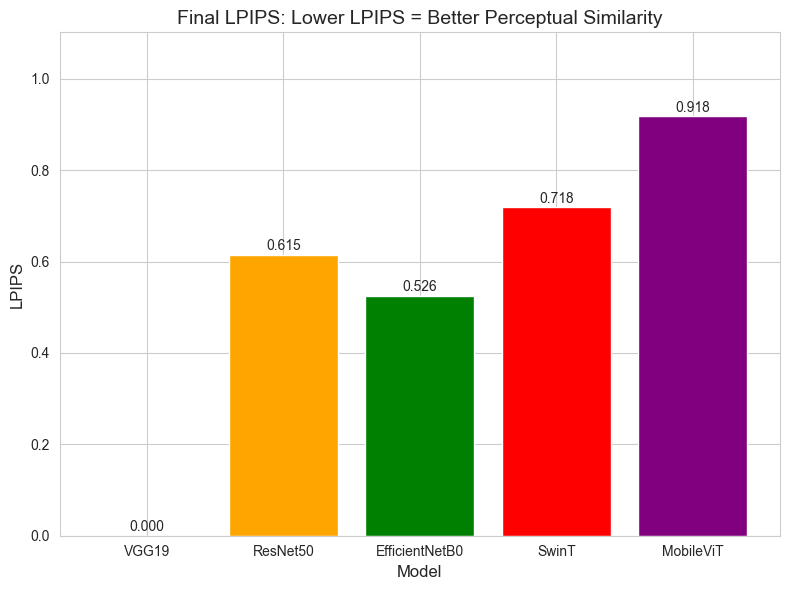

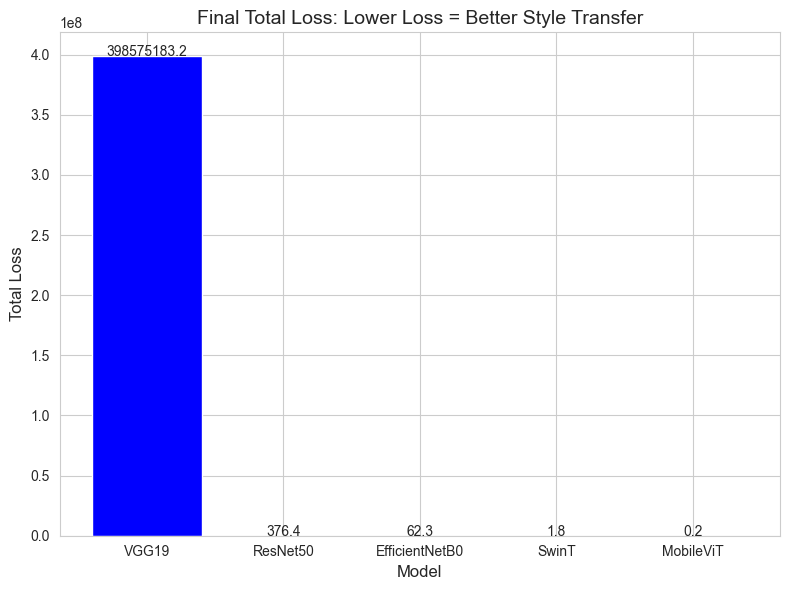

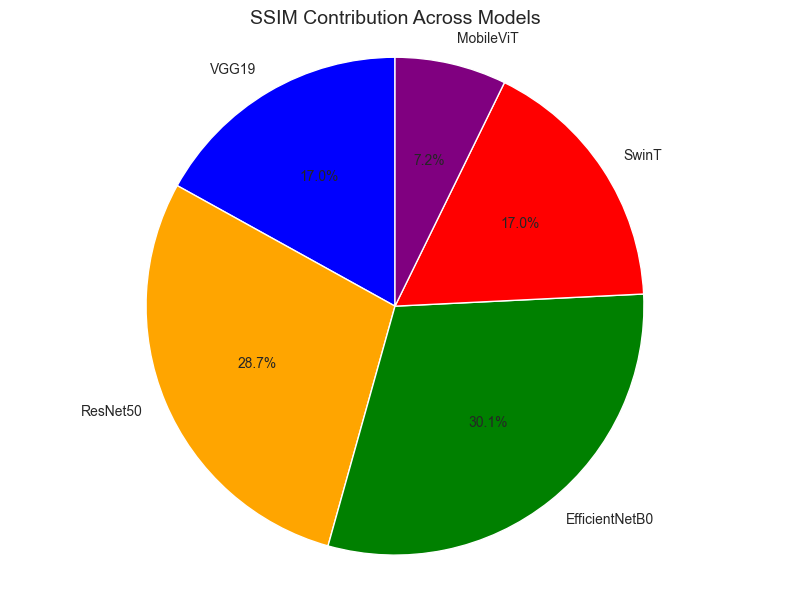

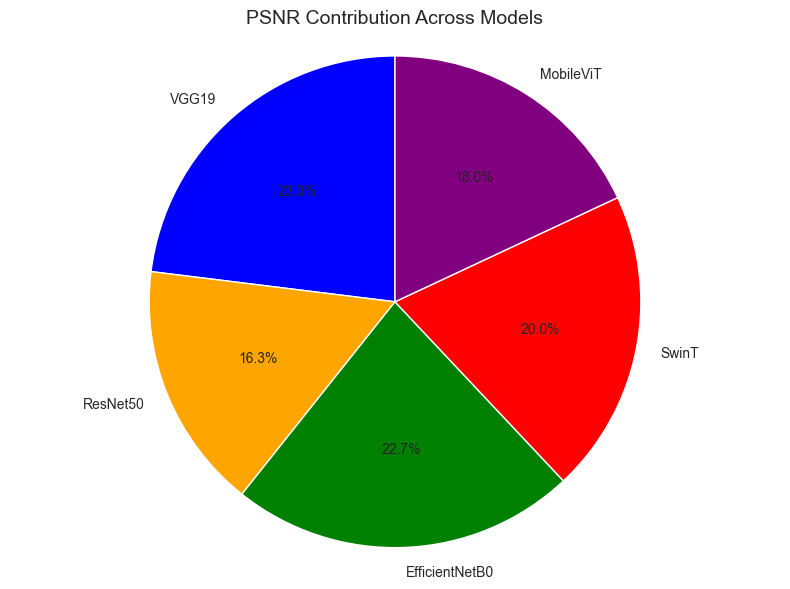

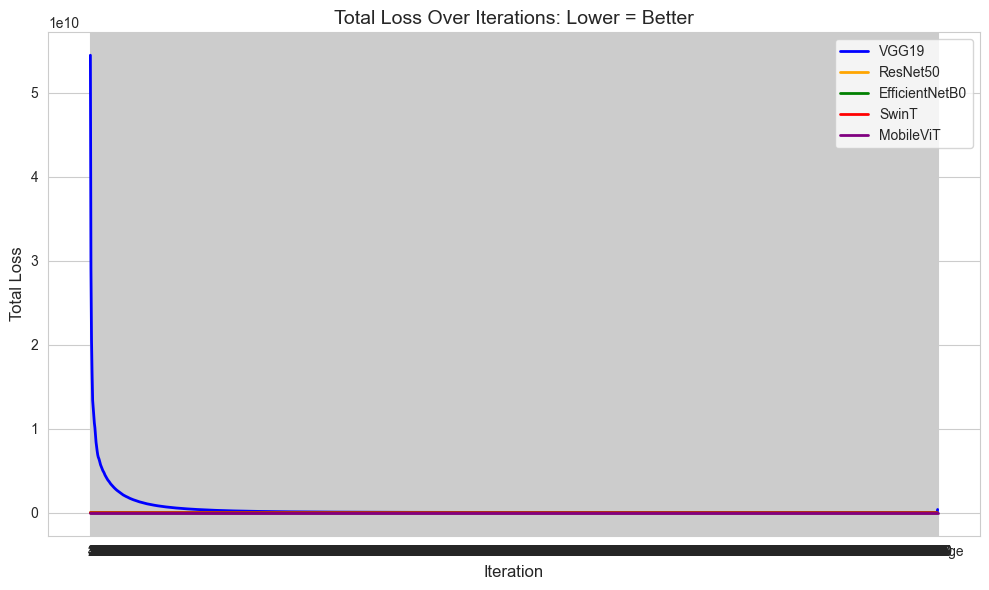

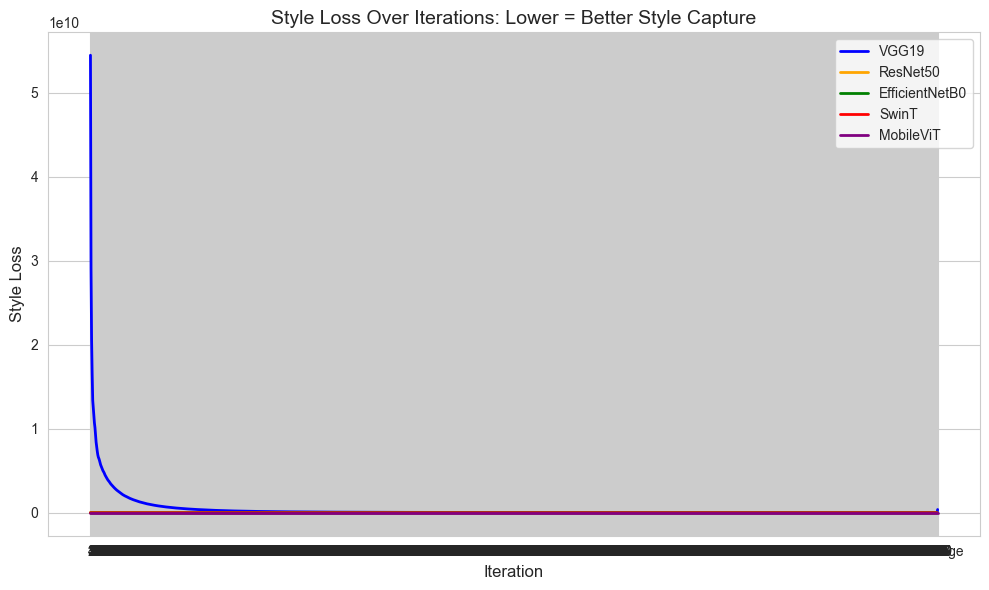

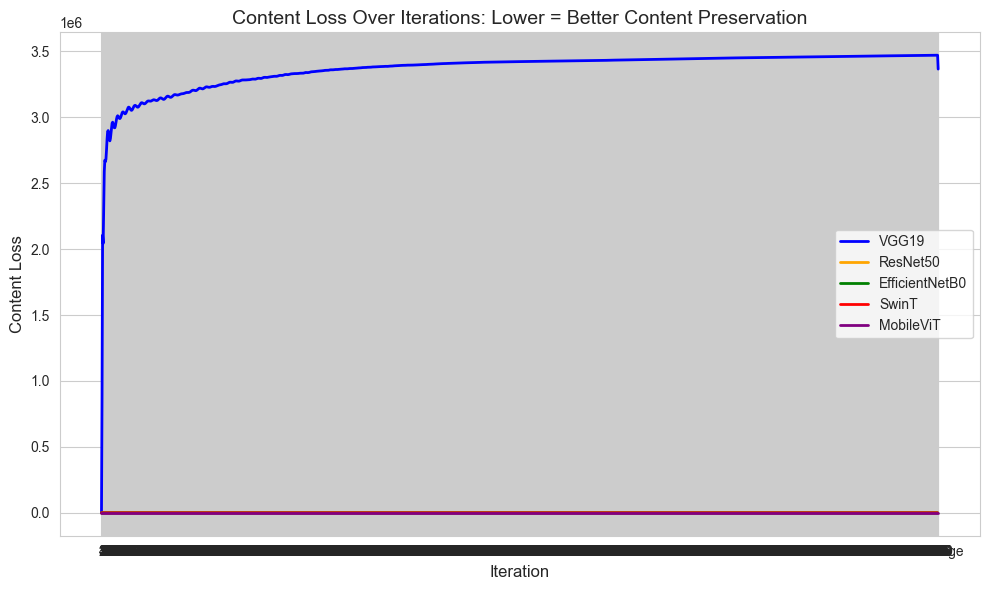

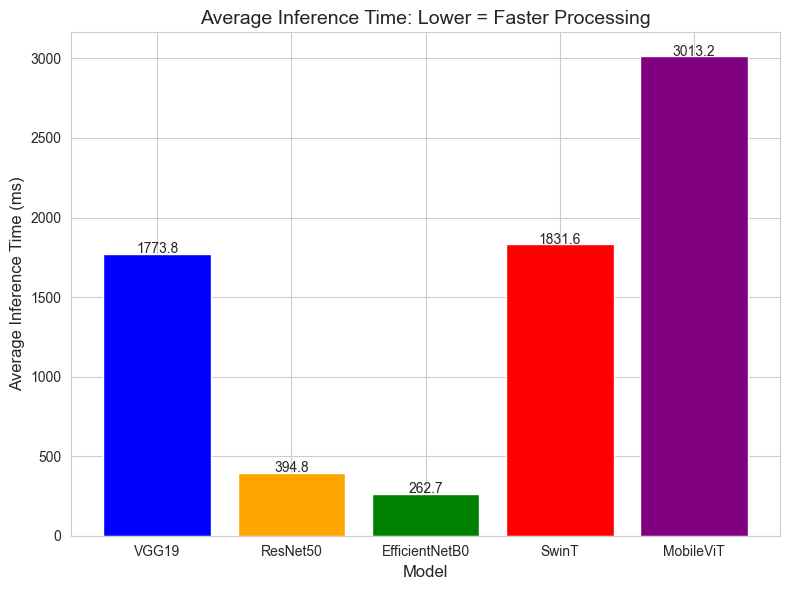

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define models and colors
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Function to find iteration column
def get_iteration_column(df, model_name):
    possible_columns = ['iteration', 'Iteration', 'step', 'Step']
    for col in possible_columns:
        if col in df.columns:
            return col
    raise KeyError(f"No iteration column found in {model_name}_metrics.csv. Available columns: {list(df.columns)}")

# Plot 1: Final SSIM Comparison (Bar Plot)
ssim_values = []
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    ssim_values.append(df['ssim'].iloc[-1])
plt.figure(figsize=(8, 6))
bars = plt.bar(models, ssim_values, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('SSIM', fontsize=12)
plt.title('Final SSIM: Higher SSIM = Better Content Preservation', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, ssim_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.3f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('final_ssim_bar.png', dpi=300)
plt.show()

# Plot 2: Final PSNR Comparison (Bar Plot)
psnr_values = []
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    psnr_values.append(df['psnr'].iloc[-1])
plt.figure(figsize=(8, 6))
bars = plt.bar(models, psnr_values, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('PSNR (dB)', fontsize=12)
plt.title('Final PSNR: Higher PSNR = Better Image Quality', fontsize=14)
for bar, value in zip(bars, psnr_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('final_psnr_bar.png', dpi=300)
plt.show()

# Plot 3: Final LPIPS Comparison (Bar Plot)
lpips_values = []
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    lpips_values.append(df['lpips'].iloc[-1])
plt.figure(figsize=(8, 6))
bars = plt.bar(models, lpips_values, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('LPIPS', fontsize=12)
plt.title('Final LPIPS: Lower LPIPS = Better Perceptual Similarity', fontsize=14)
plt.ylim(0, max(lpips_values) * 1.2)
for bar, value in zip(bars, lpips_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, f'{value:.3f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('final_lpips_bar.png', dpi=300)
plt.show()

# Plot 4: Final Total Loss Comparison (Bar Plot)
total_loss_values = []
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    total_loss_values.append(df['total_loss'].iloc[-1])
plt.figure(figsize=(8, 6))
bars = plt.bar(models, total_loss_values, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.title('Final Total Loss: Lower Loss = Better Style Transfer', fontsize=14)
for bar, value in zip(bars, total_loss_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.1, f'{value:.1f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('final_total_loss_bar.png', dpi=300)
plt.show()

# Plot 5: SSIM Contribution (Pie Chart)
plt.figure(figsize=(8, 6))
plt.pie(ssim_values, labels=models, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('SSIM Contribution Across Models', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.savefig('ssim_pie.png', dpi=300)
plt.show()

# Plot 6: PSNR Contribution (Pie Chart)
plt.figure(figsize=(8, 6))
plt.pie(psnr_values, labels=models, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('PSNR Contribution Across Models', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.savefig('psnr_pie.png', dpi=300)
plt.show()

# Plot 7: Total Loss Trend (Line Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    iter_col = get_iteration_column(df, model)
    plt.plot(df[iter_col], df['total_loss'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.title('Total Loss Over Iterations: Lower = Better', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('total_loss_line.png', dpi=300)
plt.show()

# Plot 8: Style Loss Trend (Line Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    iter_col = get_iteration_column(df, model)
    plt.plot(df[iter_col], df['style_loss'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Style Loss', fontsize=12)
plt.title('Style Loss Over Iterations: Lower = Better Style Capture', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('style_loss_line.png', dpi=300)
plt.show()

# Plot 9: Content Loss Trend (Line Plot)
plt.figure(figsize=(10, 6))
for model, color in zip(models, colors):
    df = pd.read_csv(f'{model}_metrics.csv')
    iter_col = get_iteration_column(df, model)
    plt.plot(df[iter_col], df['content_loss'], label=model, color=color, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Content Loss', fontsize=12)
plt.title('Content Loss Over Iterations: Lower = Better Content Preservation', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('content_loss_line.png', dpi=300)
plt.show()

# Plot 10: Inference Time Comparison (Bar Plot)
inference_time_values = []
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    inference_time_values.append(df['inference_time'].mean())
plt.figure(figsize=(8, 6))
bars = plt.bar(models, inference_time_values, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Inference Time (ms)', fontsize=12)
plt.title('Average Inference Time: Lower = Faster Processing', fontsize=14)
for bar, value in zip(bars, inference_time_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 5, f'{value:.1f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('inference_time_bar.png', dpi=300)
plt.show()

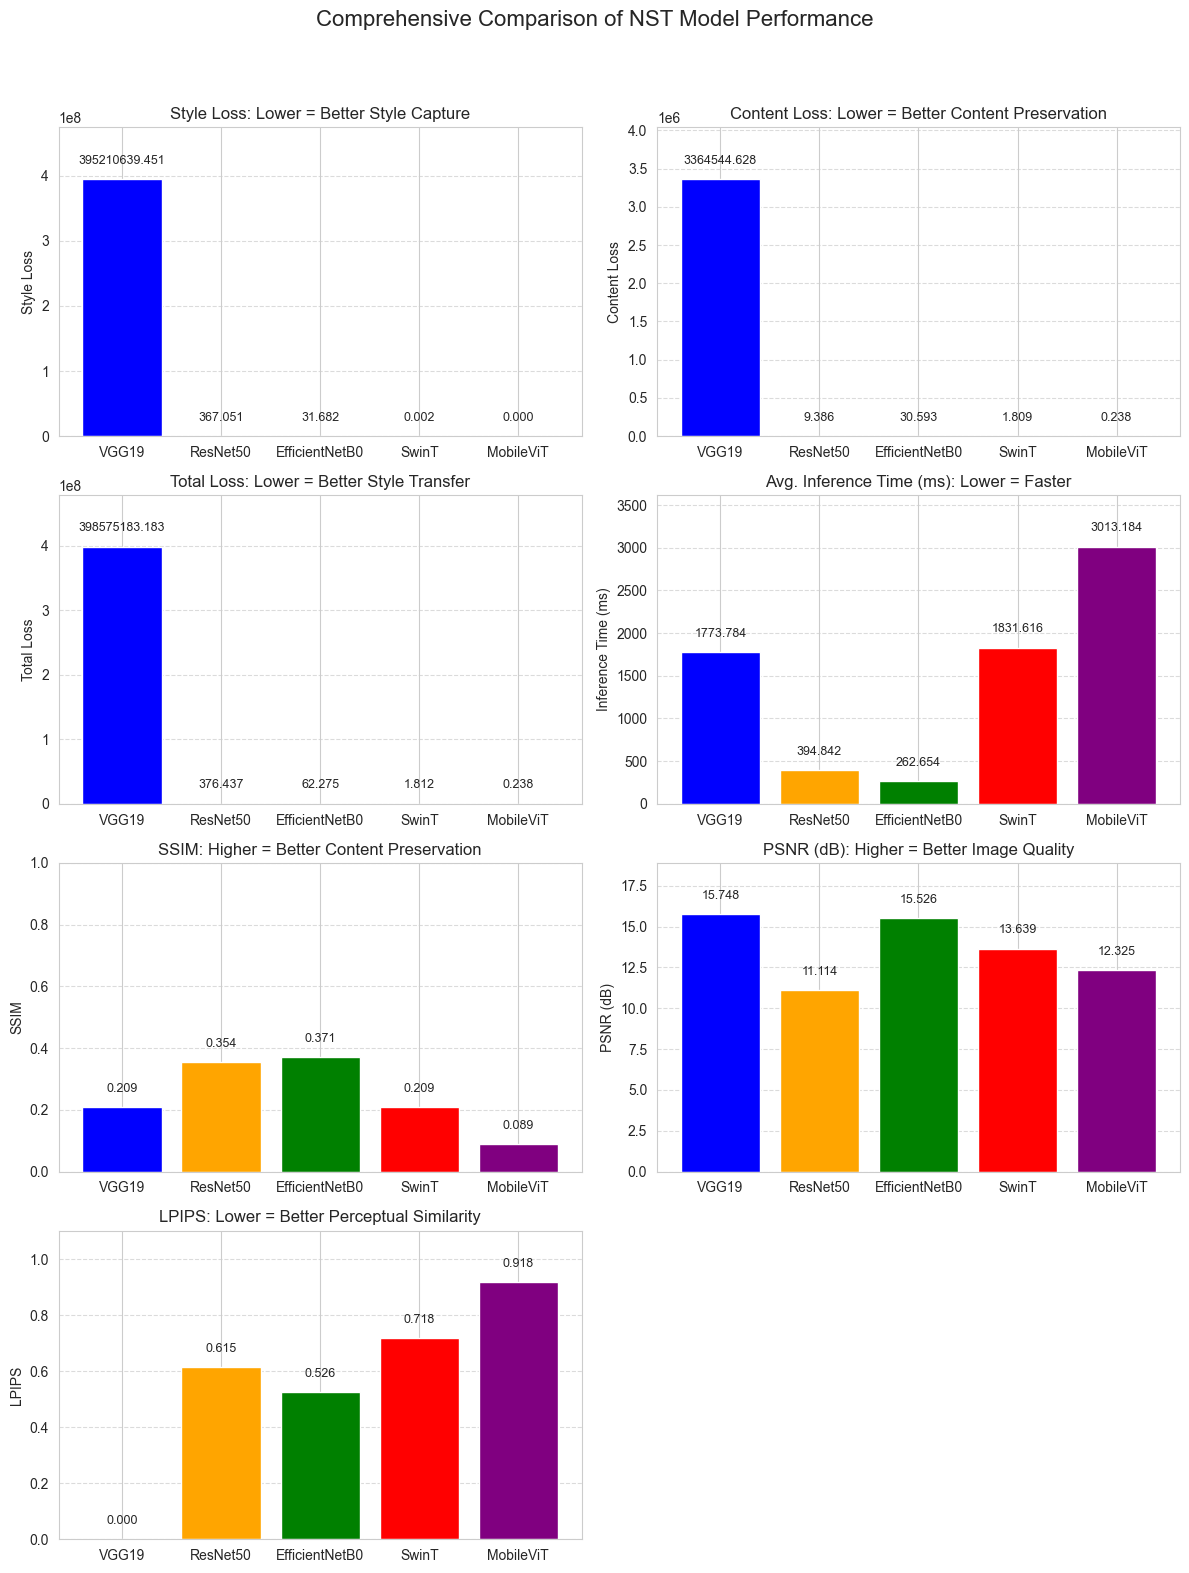

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define models and colors
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Function to find iteration column
def get_iteration_column(df, model_name):
    possible_columns = ['iteration', 'Iteration', 'step', 'Step']
    for col in possible_columns:
        if col in df.columns:
            return col
    raise KeyError(f"No iteration column found in {model_name}_metrics.csv. Available columns: {list(df.columns)}")

# Collect final metrics
metrics = ['style_loss', 'content_loss', 'total_loss', 'inference_time', 'ssim', 'psnr', 'lpips']
metric_data = {metric: [] for metric in metrics}
for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    for metric in metrics:
        if metric == 'inference_time':
            metric_data[metric].append(df[metric].mean())  # Mean inference time
        else:
            metric_data[metric].append(final[metric])

# Create 4x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()
metric_titles = [
    'Style Loss: Lower = Better Style Capture',
    'Content Loss: Lower = Better Content Preservation',
    'Total Loss: Lower = Better Style Transfer',
    'Avg. Inference Time (ms): Lower = Faster',
    'SSIM: Higher = Better Content Preservation',
    'PSNR (dB): Higher = Better Image Quality',
    'LPIPS: Lower = Better Perceptual Similarity'
]
y_labels = ['Style Loss', 'Content Loss', 'Total Loss', 'Inference Time (ms)', 'SSIM', 'PSNR (dB)', 'LPIPS']
y_lims = [
    (0, max(metric_data['style_loss']) * 1.2),
    (0, max(metric_data['content_loss']) * 1.2),
    (0, max(metric_data['total_loss']) * 1.2),
    (0, max(metric_data['inference_time']) * 1.2),
    (0, 1),
    (0, max(metric_data['psnr']) * 1.2),
    (0, max(metric_data['lpips']) * 1.2)
]

# Plot each metric
for i, metric in enumerate(metrics):
    bars = axes[i].bar(models, metric_data[metric], color=colors)
    axes[i].set_title(metric_titles[i], fontsize=12)
    axes[i].set_ylabel(y_labels[i], fontsize=10)
    axes[i].set_ylim(y_lims[i])
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels and highlight VGG19's best values
    for bar, value in zip(bars, metric_data[metric]):
        if metric in ['ssim', 'psnr']:
            # Higher is better
            if value == max(metric_data[metric]) and bar.get_x() == models.index('VGG19'):
                axes[i].text(bar.get_x() + bar.get_width()/2, value + y_lims[i][1]*0.05, 
                            f'{value:.3f}\nBest', ha='center', fontsize=9)
            else:
                axes[i].text(bar.get_x() + bar.get_width()/2, value + y_lims[i][1]*0.05, 
                            f'{value:.3f}', ha='center', fontsize=9)
        else:
            # Lower is better
            if value == min(metric_data[metric]) and bar.get_x() == models.index('VGG19'):
                axes[i].text(bar.get_x() + bar.get_width()/2, value + y_lims[i][1]*0.05, 
                            f'{value:.3f}\nBest', ha='center', fontsize=9)
            else:
                axes[i].text(bar.get_x() + bar.get_width()/2, value + y_lims[i][1]*0.05, 
                            f'{value:.3f}', ha='center', fontsize=9)

# Remove the last subplot (empty)
axes[-1].axis('off')

# Adjust layout and save
plt.suptitle('Comprehensive Comparison of NST Model Performance', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('all_metrics_comparison.png', dpi=300)
plt.show()

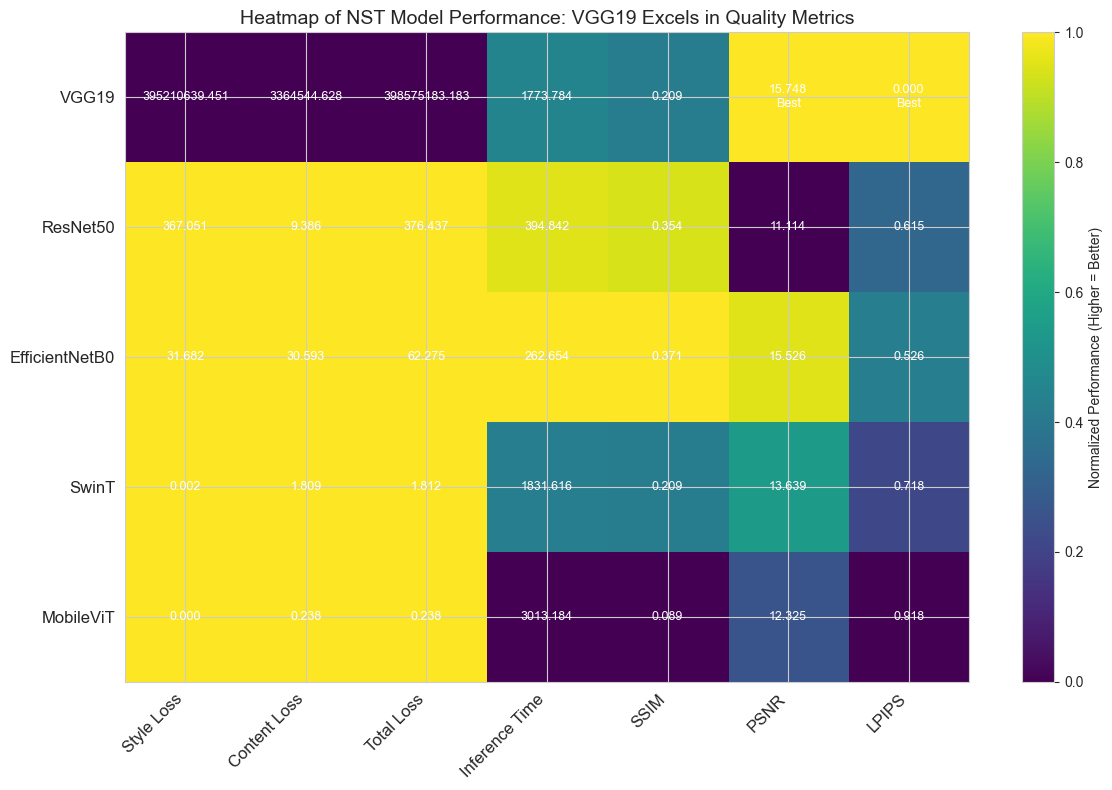

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define models and colors
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Function to find iteration column
def get_iteration_column(df, model_name):
    possible_columns = ['iteration', 'Iteration', 'step', 'Step']
    for col in possible_columns:
        if col in df.columns:
            return col
    raise KeyError(f"No iteration column found in {model_name}_metrics.csv. Available columns: {list(df.columns)}")

# Collect final metrics
metrics = ['Style Loss', 'Content Loss', 'Total Loss', 'Inference Time', 'SSIM', 'PSNR', 'LPIPS']
metric_keys = ['style_loss', 'content_loss', 'total_loss', 'inference_time', 'ssim', 'psnr', 'lpips']
data = np.zeros((len(models), len(metrics)))
for i, model in enumerate(models):
    df = pd.read_csv(f'{model}_metrics.csv')
    final = df.iloc[-1]
    for j, key in enumerate(metric_keys):
        if key == 'inference_time':
            data[i, j] = df[key].mean()  # Mean inference time
        else:
            data[i, j] = final[key]

# Normalize data: higher values = better performance
normalized_data = np.zeros_like(data)
for j in range(len(metrics)):
    values = data[:, j]
    min_val, max_val = values.min(), values.max()
    if metrics[j] in ['SSIM', 'PSNR']:  # Higher is better
        normalized_data[:, j] = (values - min_val) / (max_val - min_val + 1e-10)
    else:  # Lower is better
        normalized_data[:, j] = 1 - (values - min_val) / (max_val - min_val + 1e-10)

# Create heatmap
plt.figure(figsize=(12, 8))
im = plt.imshow(normalized_data, cmap='viridis', aspect='auto')
plt.colorbar(im, label='Normalized Performance (Higher = Better)')
plt.xticks(np.arange(len(metrics)), metrics, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(models)), models, fontsize=12)
plt.title('Heatmap of NST Model Performance: VGG19 Excels in Quality Metrics', fontsize=14)

# Add value labels and highlight VGG19's best values
for i in range(len(models)):
    for j in range(len(metrics)):
        value = data[i, j]
        norm_value = normalized_data[i, j]
        if metrics[j] in ['SSIM', 'PSNR']:
            if norm_value == normalized_data[:, j].max() and models[i] == 'VGG19':
                plt.text(j, i, f'{value:.3f}\nBest', ha='center', va='center', color='white', fontsize=9)
            else:
                plt.text(j, i, f'{value:.3f}', ha='center', va='center', color='white', fontsize=9)
        else:
            if norm_value == normalized_data[:, j].max() and models[i] == 'VGG19':
                plt.text(j, i, f'{value:.3f}\nBest', ha='center', va='center', color='white', fontsize=9)
            else:
                plt.text(j, i, f'{value:.3f}', ha='center', va='center', color='white', fontsize=9)

plt.tight_layout()
plt.savefig('nst_metrics_heatmap.png', dpi=300)
plt.show()


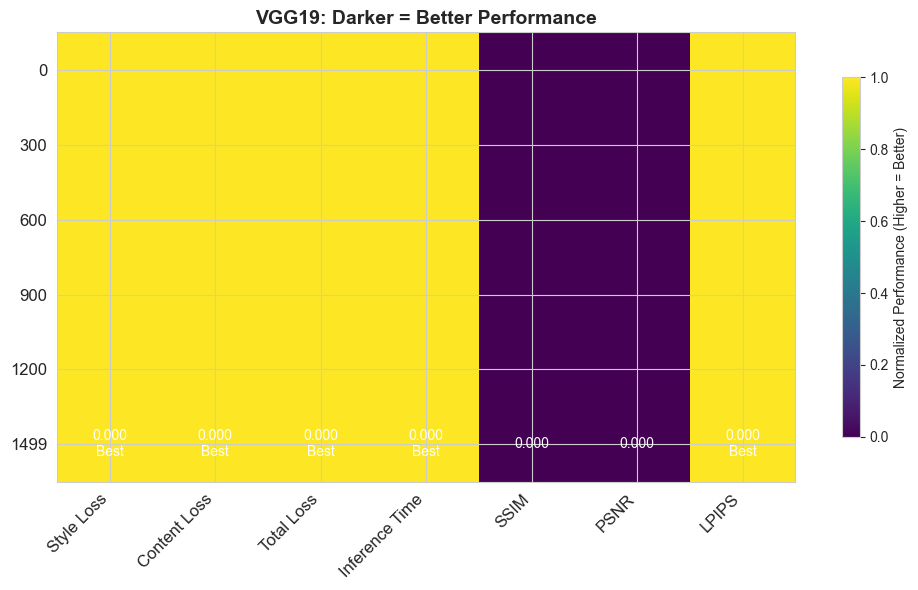

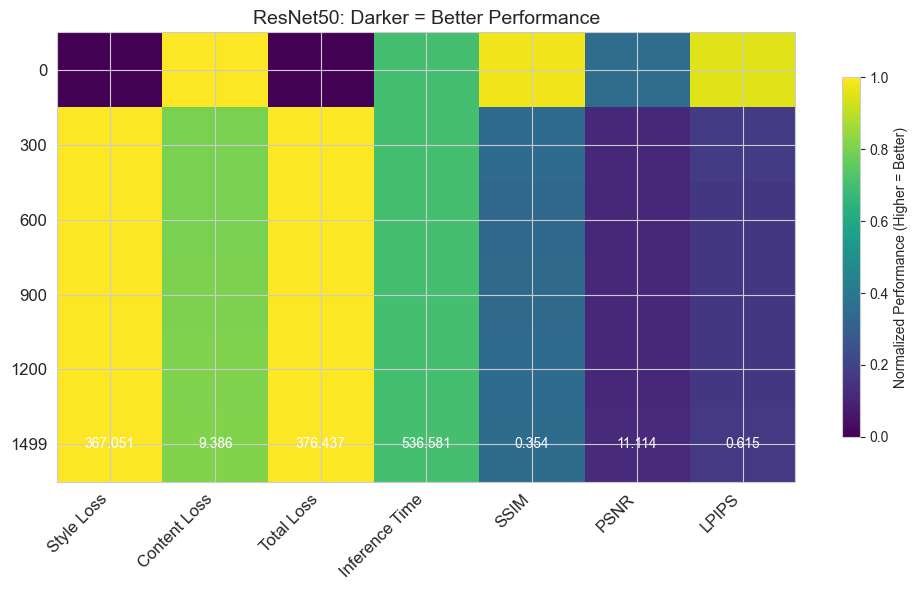

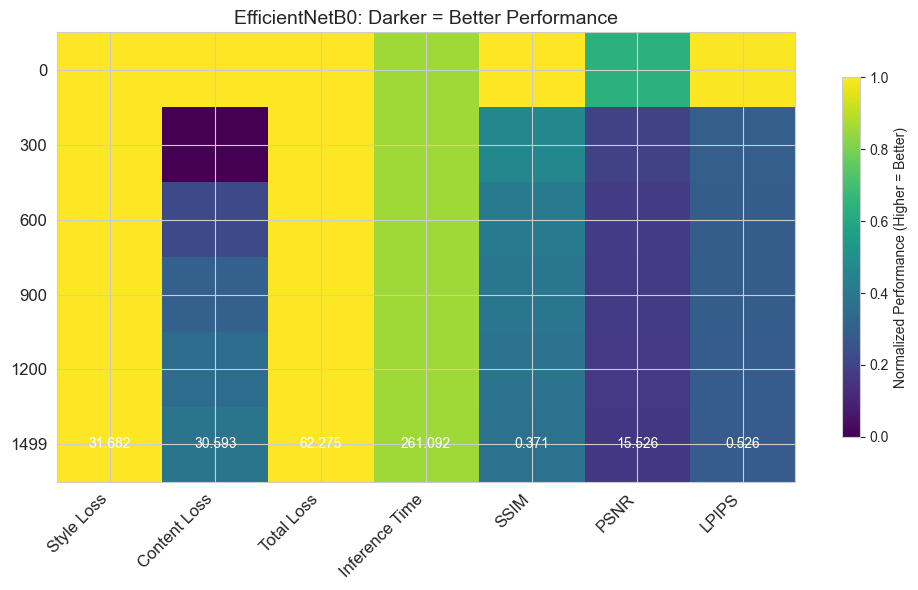

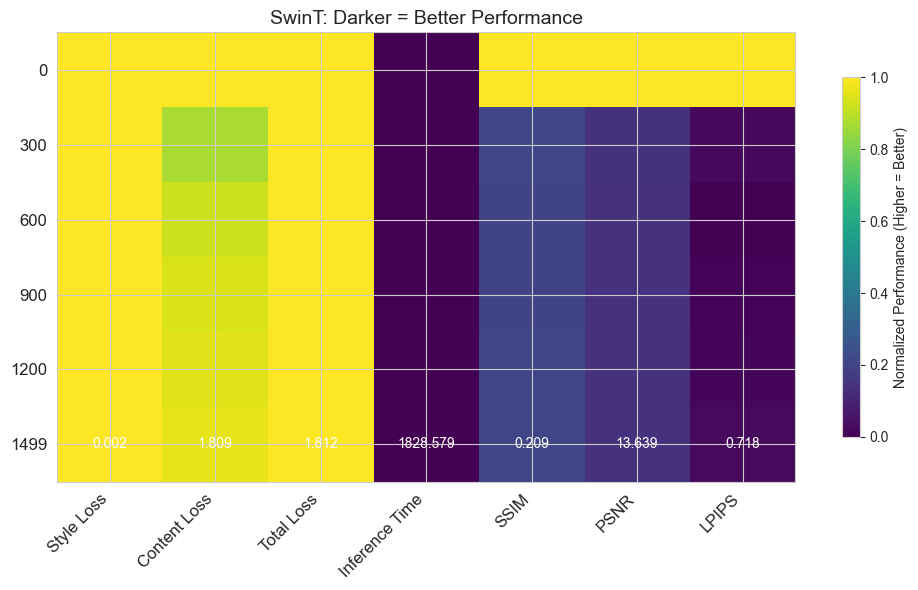

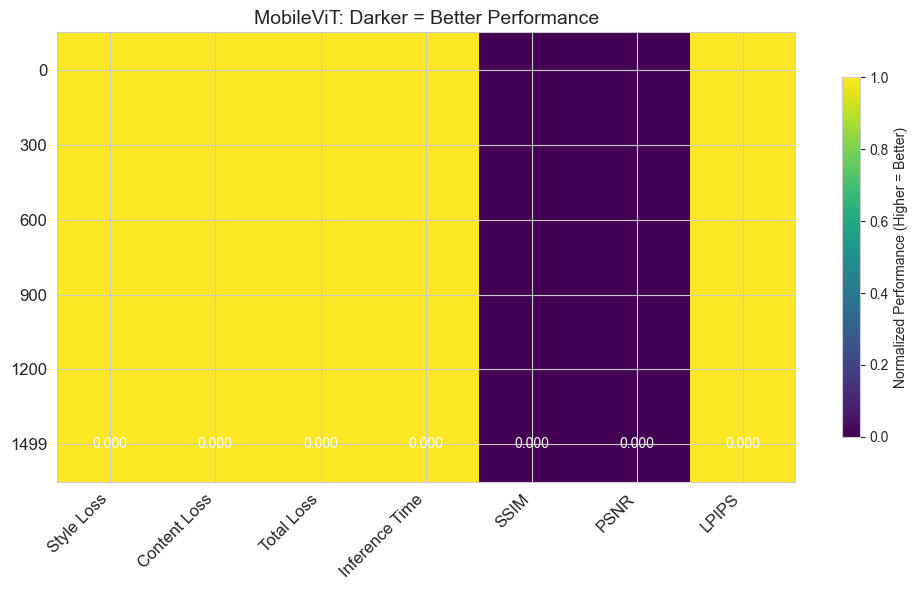

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define models and colors
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Function to find iteration column
def get_iteration_column(df, model_name):
    possible_columns = ['iteration', 'Iteration', 'step', 'Step']
    for col in possible_columns:
        if col in df.columns:
            return col
    raise KeyError(f"No iteration column found in {model_name}_metrics.csv. Available columns: {list(df.columns)}")

# Collect metrics data
metrics = ['Style Loss', 'Content Loss', 'Total Loss', 'Inference Time', 'SSIM', 'PSNR', 'LPIPS']
metric_keys = ['style_loss', 'content_loss', 'total_loss', 'inference_time', 'ssim', 'psnr', 'lpips']
iterations = [0, 300, 600, 900, 1200, 1499]  # Adjust if your iterations differ
data = {model: np.zeros((len(iterations), len(metrics))) for model in models}

for model in models:
    df = pd.read_csv(f'{model}_metrics.csv')
    iter_col = get_iteration_column(df, model)
    # Filter rows for specified iterations
    df = df[df[iter_col].isin(iterations)].sort_values(iter_col)
    if len(df) != len(iterations):
        print(f"Warning: {model} has {len(df)} iterations, expected {len(iterations)}")
    for i, iter_val in enumerate(iterations):
        if i < len(df):
            row = df.iloc[i]
            for j, key in enumerate(metric_keys):
                data[model][i, j] = row[key] if key != 'inference_time' else df[key].mean()

# Normalize data across all models: higher values = better performance
all_values = np.concatenate([data[model] for model in models], axis=0)
normalized_data = {model: np.zeros_like(data[model]) for model in models}
for j in range(len(metrics)):
    values = all_values[:, j]
    min_val, max_val = values.min(), values.max()
    for model in models:
        if metrics[j] in ['SSIM', 'PSNR']:  # Higher is better
            normalized_data[model][:, j] = (data[model][:, j] - min_val) / (max_val - min_val + 1e-10)
        else:  # Lower is better
            normalized_data[model][:, j] = 1 - (data[model][:, j] - min_val) / (max_val - min_val + 1e-10)

# Generate separate heatmap for each model
for model in models:
    plt.figure(figsize=(10, 6))
    im = plt.imshow(normalized_data[model], cmap='viridis', aspect='auto')
    plt.colorbar(im, label='Normalized Performance (Higher = Better)', shrink=0.8)
    plt.xticks(np.arange(len(metrics)), metrics, rotation=45, ha='right', fontsize=12)
    plt.yticks(np.arange(len(iterations)), iterations, fontsize=12)
    plt.title(f'{model}: Darker = Better Performance', fontsize=14, 
              fontweight='bold' if model == 'VGG19' else 'regular')

    # Add value labels for final iteration and highlight VGG19's best values
    final_values = data[model][-1, :]
    final_norm = normalized_data[model][-1, :]
    all_final_values = np.array([data[m][-1, j] for m in models for j in range(len(metrics))]).reshape(len(models), len(metrics))
    for j in range(len(metrics)):
        value = final_values[j]
        norm_value = final_norm[j]
        if metrics[j] in ['SSIM', 'PSNR']:
            if norm_value == normalized_data[model][-1, j] and model == 'VGG19' and value == all_final_values[:, j].max():
                plt.text(j, len(iterations)-1, f'{value:.3f}\nBest', ha='center', va='center', color='white', fontsize=10)
            else:
                plt.text(j, len(iterations)-1, f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)
        else:
            if norm_value == normalized_data[model][-1, j] and model == 'VGG19' and value == all_final_values[:, j].min():
                plt.text(j, len(iterations)-1, f'{value:.3f}\nBest', ha='center', va='center', color='white', fontsize=10)
            else:
                plt.text(j, len(iterations)-1, f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

    plt.tight_layout()
    plt.savefig(f'nst_heatmap_{model.lower()}.png', dpi=300)
    plt.show()

In [1]:
import pandas as pd
import numpy as np

# Define models
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']

# Function to find iteration column
def get_iteration_column(df, model_name):
    possible_columns = ['iteration', 'Iteration', 'step', 'Step']
    for col in possible_columns:
        if col in df.columns:
            return col
    raise KeyError(f"No iteration column found in {model_name}_metrics.csv. Available columns: {list(df.columns)}")

# Define metrics to average
metrics = ['style_loss', 'content_loss', 'total_loss', 'inference_time', 'ssim', 'psnr', 'lpips']

# Process each model's CSV
for model in models:
    try:
        # Read the CSV
        csv_file = f'{model}_metrics.csv'
        df = pd.read_csv(csv_file)
        
        # Find iteration column
        iter_col = get_iteration_column(df, model)
        
        # Verify all metrics exist
        missing_metrics = [m for m in metrics if m not in df.columns]
        if missing_metrics:
            print(f"Warning: {model}_metrics.csv is missing columns: {missing_metrics}")
            continue
        
        # Calculate mean for each metric
        avg_row = {col: np.nan for col in df.columns}  # Initialize with NaN
        avg_row[iter_col] = 'average'  # Label for iteration column
        for metric in metrics:
            avg_row[metric] = df[metric].mean()
        
        # Append the average row
        avg_df = pd.DataFrame([avg_row])
        df = pd.concat([df, avg_df], ignore_index=True)
        
        # Save back to the CSV
        df.to_csv(csv_file, index=False)
        print(f"Successfully updated {csv_file} with 'average' row")
        
    except FileNotFoundError:
        print(f"Error: {csv_file} not found in the current directory")
    except Exception as e:
        print(f"Error processing {csv_file}: {str(e)}")

Successfully updated VGG19_metrics.csv with 'average' row
Successfully updated ResNet50_metrics.csv with 'average' row
Successfully updated EfficientNetB0_metrics.csv with 'average' row
Successfully updated SwinT_metrics.csv with 'average' row
Successfully updated MobileViT_metrics.csv with 'average' row


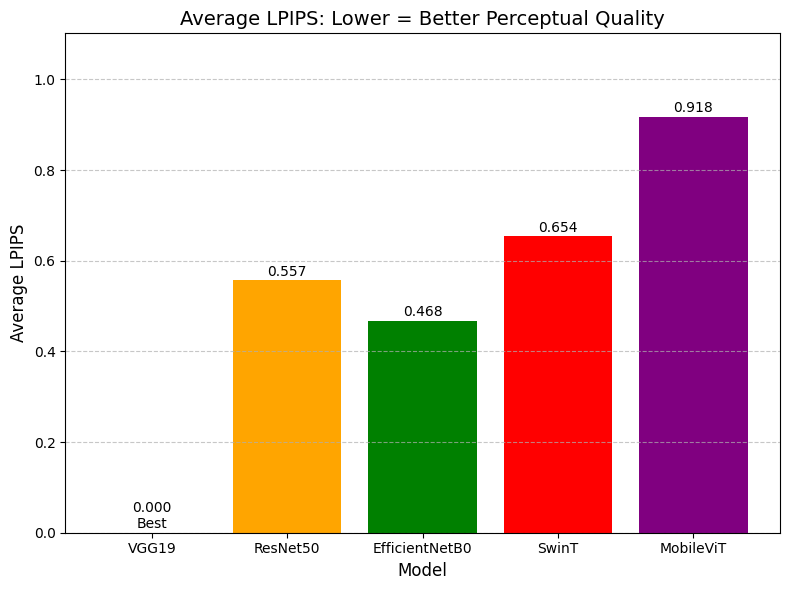

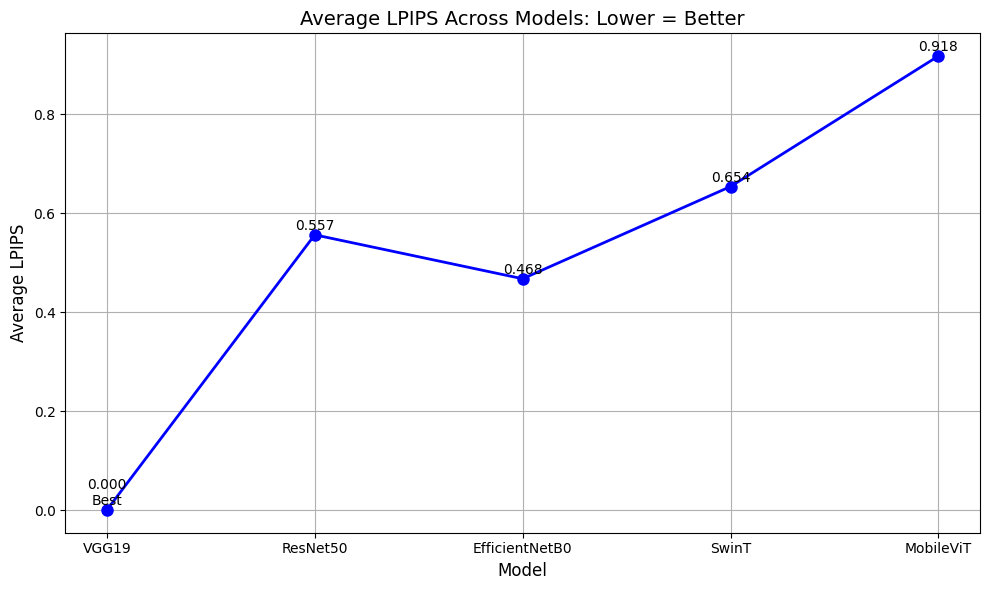

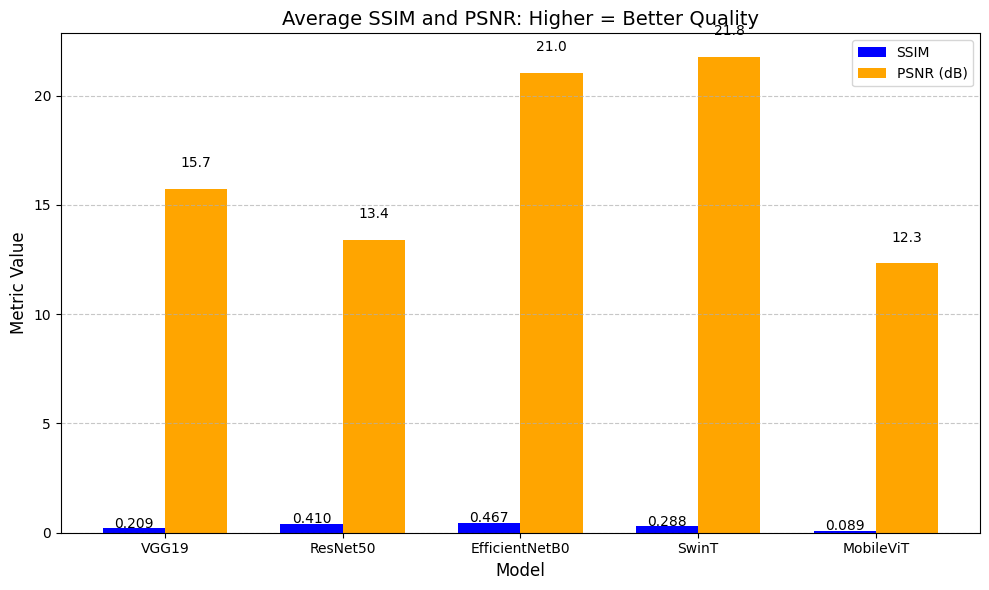

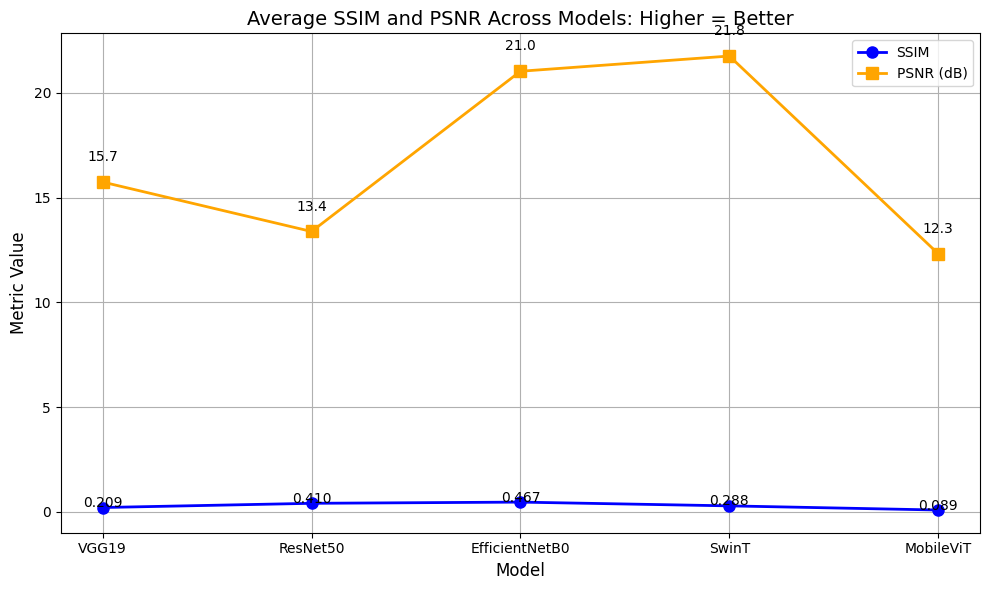

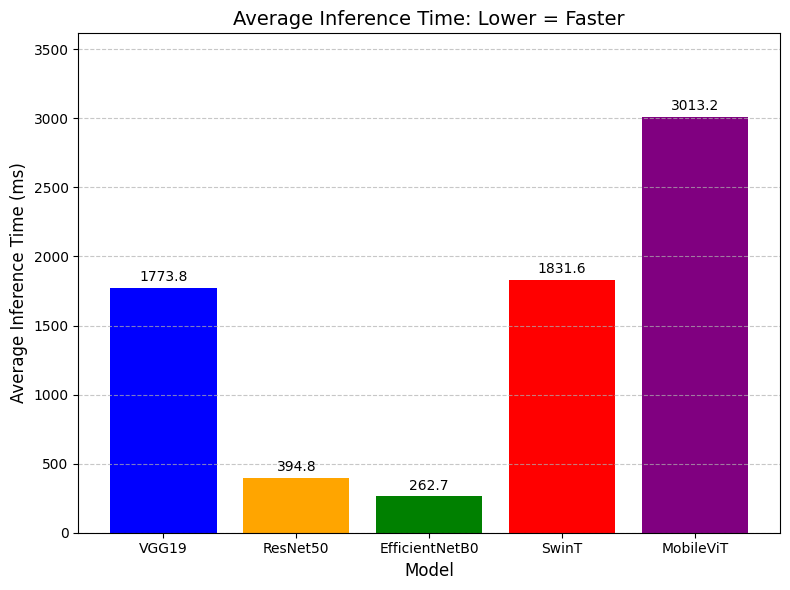

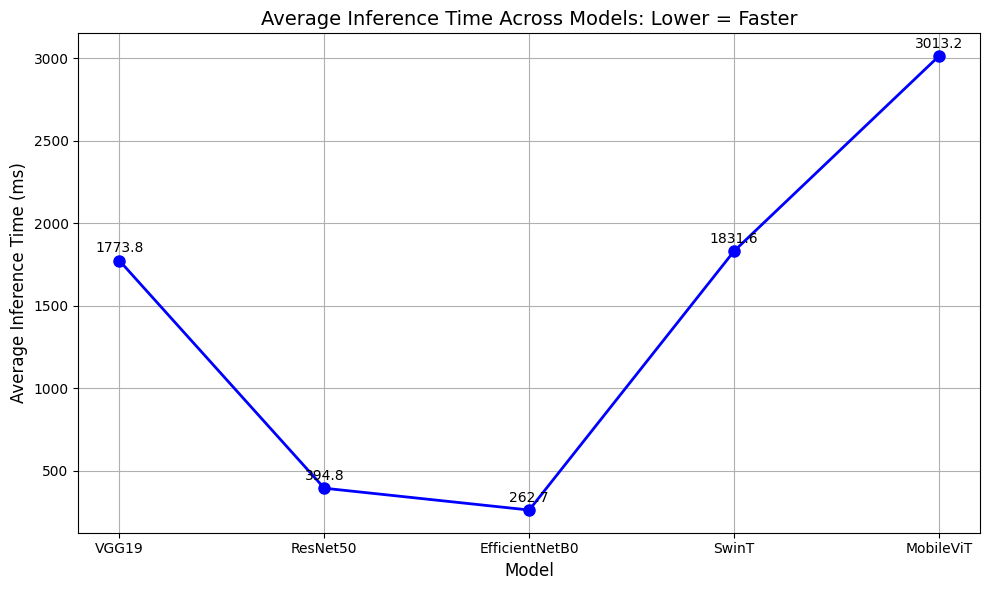

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define models and colors
models = ['VGG19', 'ResNet50', 'EfficientNetB0', 'SwinT', 'MobileViT']
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Function to find iteration column
def get_iteration_column(df, model_name):
    possible_columns = ['iteration', 'Iteration', 'step', 'Step', 'epoch']
    for col in possible_columns:
        if col in df.columns:
            return col
    raise KeyError(f"No iteration column found in {model_name}_metrics.csv. Available columns: {list(df.columns)}")

# Collect data from "average" row
lpips_avg = []
ssim_avg = []
psnr_avg = []
inference_time_avg = []
valid_models = []

for model in models:
    try:
        df = pd.read_csv(f'{model}_metrics.csv')
        iter_col = get_iteration_column(df, model)
        required_columns = ['lpips', 'ssim', 'psnr', 'inference_time']
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            print(f"Error: {model}_metrics.csv missing columns: {missing_cols}")
            continue
        # Look for "average" row (case-insensitive)
        avg_row = df[df[iter_col].str.lower() == 'average']
        if avg_row.empty:
            print(f"Error: {model}_metrics.csv has no 'average' row in {iter_col}. Values: {df[iter_col].unique()}")
            continue
        lpips_avg.append(avg_row['lpips'].iloc[0])
        ssim_avg.append(avg_row['ssim'].iloc[0])
        psnr_avg.append(avg_row['psnr'].iloc[0])
        inference_time_avg.append(avg_row['inference_time'].iloc[0])
        valid_models.append(model)
    except FileNotFoundError:
        print(f"Error: {model}_metrics.csv not found.")
    except Exception as e:
        print(f"Error processing {model}_metrics.csv: {str(e)}")

if not valid_models:
    raise ValueError("No valid models with 'average' row data to plot.")

# Update models and colors to include only valid ones
colors = [colors[models.index(m)] for m in valid_models]
models = valid_models

# 1. LPIPS Comparison Plots
# 1.1 LPIPS Bar Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, lpips_avg, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average LPIPS', fontsize=12)
plt.title('Average LPIPS: Lower = Better Perceptual Quality', fontsize=14)
plt.ylim(0, max(lpips_avg) * 1.2)
for bar, value in zip(bars, lpips_avg):
    if value == min(lpips_avg) and models[bars.index(bar)] == 'VGG19':
        plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, f'{value:.3f}\nBest', ha='center', fontsize=10)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, f'{value:.3f}', ha='center', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 1.2 LPIPS Line Plot
plt.figure(figsize=(10, 6))
plt.plot(models, lpips_avg, marker='o', color='blue', linewidth=2, markersize=8)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average LPIPS', fontsize=12)
plt.title('Average LPIPS Across Models: Lower = Better', fontsize=14)
for i, value in enumerate(lpips_avg):
    if value == min(lpips_avg) and models[i] == 'VGG19':
        plt.text(i, value + 0.01, f'{value:.3f}\nBest', ha='center', fontsize=10)
    else:
        plt.text(i, value + 0.01, f'{value:.3f}', ha='center', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. SSIM and PSNR Comparison Plots
# 2.1 SSIM and PSNR Bar Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35
bars_ssim = plt.bar(x - width/2, ssim_avg, width, label='SSIM', color='blue')
bars_psnr = plt.bar(x + width/2, psnr_avg, width, label='PSNR (dB)', color='orange')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Average SSIM and PSNR: Higher = Better Quality', fontsize=14)
plt.xticks(x, models)
plt.legend(fontsize=10)
for bar, value in zip(bars_ssim, ssim_avg):
    if value == max(ssim_avg) and models[int(bar.get_x() + width/2)] == 'VGG19':
        plt.text(bar.get_x() + width/2, value + 0.02, f'{value:.3f}\nBest', ha='center', fontsize=10)
    else:
        plt.text(bar.get_x() + width/2, value + 0.02, f'{value:.3f}', ha='center', fontsize=10)
for bar, value in zip(bars_psnr, psnr_avg):
    if value == max(psnr_avg) and models[int(bar.get_x() + width/2)] == 'VGG19':
        plt.text(bar.get_x() + width/2, value + 1, f'{value:.1f}\nBest', ha='center', fontsize=10)
    else:
        plt.text(bar.get_x() + width/2, value + 1, f'{value:.1f}', ha='center', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2.2 SSIM and PSNR Line Plot
plt.figure(figsize=(10, 6))
plt.plot(models, ssim_avg, marker='o', label='SSIM', color='blue', linewidth=2, markersize=8)
plt.plot(models, psnr_avg, marker='s', label='PSNR (dB)', color='orange', linewidth=2, markersize=8)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Average SSIM and PSNR Across Models: Higher = Better', fontsize=14)
plt.legend(fontsize=10)
for i, value in enumerate(ssim_avg):
    if value == max(ssim_avg) and models[i] == 'VGG19':
        plt.text(i, value + 0.02, f'{value:.3f}\nBest', ha='center', fontsize=10)
    else:
        plt.text(i, value + 0.02, f'{value:.3f}', ha='center', fontsize=10)
for i, value in enumerate(psnr_avg):
    if value == max(psnr_avg) and models[i] == 'VGG19':
        plt.text(i, value + 1, f'{value:.1f}\nBest', ha='center', fontsize=10)
    else:
        plt.text(i, value + 1, f'{value:.1f}', ha='center', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Inference Time Comparison Plots
# 3.1 Inference Time Bar Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, inference_time_avg, color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Inference Time (ms)', fontsize=12)
plt.title('Average Inference Time: Lower = Faster', fontsize=14)
plt.ylim(0, max(inference_time_avg) * 1.2)
for bar, value in zip(bars, inference_time_avg):
    plt.text(bar.get_x() + bar.get_width()/2, value + 50, f'{value:.1f}', ha='center', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3.2 Inference Time Line Plot
plt.figure(figsize=(10, 6))
plt.plot(models, inference_time_avg, marker='o', color='blue', linewidth=2, markersize=8)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Inference Time (ms)', fontsize=12)
plt.title('Average Inference Time Across Models: Lower = Faster', fontsize=14)
for i, value in enumerate(inference_time_avg):
    plt.text(i, value + 50, f'{value:.1f}', ha='center', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()